

## Goal

The goal of this study is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision tree approache
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. You must use a 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the official test data (10,000 samples) only for testing.**

## Task 
Build a decision tree classifier with the scikit library function calls to classify digits in the MNIST dataset.


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
from keras import datasets


# Read data 

(X_train,y_train), (X_test,y_test)= datasets.mnist.load_data()   # I read data from keres dataset as two differet tupple of train and test
                                                                #  with their corresponding features and labels





11493376/11490434 [==============================] - 0s 0us/step


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system, but for this homework this is not really necessary as  the features are homogeneous (pixels) and all necessary.


In [ ]:
# print shape


# I checked how many pixels in a any of the photo exist, it was given the form of (28x28)
image_height=X_train.shape[1]                 
image_width =X_train.shape[2]
dim_image= image_height*image_width   # I found the cardinality of the each photo
dim_data= (X_train.shape[0],dim_image)  # I loaded the dimension to a tupple
print('Data Dimensionality: ', dim_data)  


# Converted 2D image to 1D array 
train_X = (np.reshape(X_train,dim_data))   # At this point, I reshaped the data as 60000,784
test_X =(np.reshape(X_test, (X_test.shape[0], dim_image))) # Reshaped test data as 10000,784





#Conversion to pandas dataframes to see data head and attributes

train_label= pd.DataFrame(y_train) 
test_label = pd.DataFrame(y_test)


data_train= pd.DataFrame(train_X)
data_test = pd.DataFrame(test_X)

data_train['labels']=train_label  # I added labels as a column at the end of the data
data_test['labels']=test_label

# print first 5 rows in your dataset
print('Head of Data:')
data_train.head(5)



Data Dimensionality:  (60000, 784)
Head of Data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the training data

#Shuffled the train data
train_x, train_y = shuffle(train_X, y_train)


# Split 80-20

#Splitted data as development and validation
(dev_x, valid_x, dev_y, valid_y)= train_test_split(train_x, train_y, test_size=0.2, random_state=42)




##5) Train a decision tree classifier on development/train data and do model selection using the validation data

* Train 3 decision tree classifiers with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [default = 2, 5, 10]. 
* Test the 3 models on validation set and choose the best one.
* Plot the train and validation set errors for those 3 settings - on one plot. 


In [ ]:

# Train decision tree classifiers
from sklearn import tree
from sklearn.metrics import accuracy_score

vals = [2,5,10] 
acc_dev = np.array([])
acc_valid =np.array([])
error_valid = []
error_dev = []
 

for ind in vals:
 clf = tree.DecisionTreeClassifier(min_samples_split=ind,random_state=0)
 clf = clf.fit(dev_x,dev_y)                     # Fitted development data and learned the model
 
 predicted_valid = clf.predict(valid_x)         # According to model, predicted labels in validation set
 acc_valid=np.append(acc_valid, accuracy_score(valid_y,predicted_valid)) 
 error_valid.append(1-accuracy_score(valid_y, predicted_valid)) # For each sample split, found an error, put it on a list
 
 predicted_dev =clf.predict(dev_x)              # Also, wanted to see how my model is fine in train set to see if there is overfitting or not
 acc_dev= np.append(acc_dev, accuracy_score(dev_y,predicted_dev))
 error_dev.append(1-accuracy_score(dev_y, predicted_dev))
 


In [ ]:
print('Respectively accuracy in validation set for 2,5,10 is ', acc_valid)
print('Respectively accuracy in development set for 2,5,10 is ', acc_dev)

Respectively accuracy in validation set for 2,5,10 is  [0.86725    0.86666667 0.8635    ]
Respectively accuracy in development set for 2,5,10 is  [1.         0.98235417 0.9643125 ]


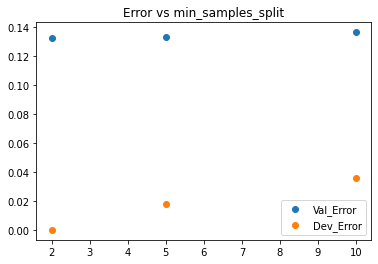

In [ ]:

# Plot errors
import matplotlib.pyplot as plt
plt.scatter(vals,error_valid)
plt.scatter(vals,error_dev)
plt.legend( ['Val_Error', 'Dev_Error'])
plt.title('Error vs min_samples_split')

plt.show()


## 7) Test your CHOSEN classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best chosen SINGLE model out of the models that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [ ]:

# Load test data

(X_train,y_train), (X_test,y_test)= datasets.mnist.load_data()

# Organize train and test datas

X_train= np.reshape(X_train, (X_train.shape[0],X_train.shape[1]*X_train.shape[2]))  # Loaded all training data -> dev+valid
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
# Choose the best min_samples_split value with the best accuracy score

ind= np.argmax(acc_valid)                                                           # Chosse the index of best accuracy to find the best tuning  min_samples_split value
ind= vals[ind]


In [ ]:


predicted_test = clf.predict(X_test) # Now, made prediction on test data
acc= accuracy_score(predicted_test,y_test)*100  # Finaly obtained test accuracy
print('Accuracy of test data is,', acc)

Accuracy of test data is, 87.12


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_test)

array([[ 918,    2,    9,    7,    5,    9,   17,    8,    3,    2],
       [   1, 1094,   10,    7,    1,    5,    4,    6,    6,    1],
       [  15,   10,  873,   42,   11,   12,   11,   30,   16,   12],
       [   8,    8,   25,  855,    8,   44,    9,    9,   27,   17],
       [   7,    6,    7,    6,  854,   10,   22,   11,   11,   48],
       [  21,    6,    9,   54,   10,  728,   15,    9,   21,   19],
       [  12,    2,   12,    5,   27,   27,  850,    4,   11,    8],
       [   4,    6,   36,   11,   12,    4,    1,  922,    8,   24],
       [  20,    8,   27,   37,   23,   31,   21,   11,  773,   23],
       [  16,    5,   12,   21,   46,   17,    4,   21,   22,  845]])


```
REPORT

MNIST dataset consists of handwritten digits with  their images and 
corresponding label. In this homework, the problem was to create
a model using Desicion Tree Classifier to be able to classify any
given handwritten digits properly.
When it comes to talk about sizes of train( development+validation)
and test size, we can see that train set has 60000 samples while test 
set has 10000 samples.At later stages, train set is divided such 
that development and validation with ratio of 0.2.Just before this step,
we shuffled train data to avoid bias. 
Before training the data, I reshaped it such that 28x28 matrix of pixels
were converted to 1x784. I did this on both train and test datas. Also, 
to see head and columns of data, I converted numpy data matrix to
pandas dataframes.Also, added labels as a column.

Results: Accuracy of validation set with model trained with 
devolopment set is subsequently [0.86875    0.86841667 0.87041667]
for min_samples_split values 2,5 and 10. Remarkably, accuracies in 
devolopment data was [1.  0.98191667 0.9650625 ]. In my opinion, the al-
gorithm in prone to overfitting.
I obtained maximum accuracy with 2 as min_samples_split, 
therefore I set it as parameter in  prediction of test 
data. Thus, accuracy in test was 87.21.
In my opinion, we see the curse of dimensionality regarding
 the speed of algorith. As there are many features beside 
 many samples, algorithm works slower than my expectations.
 In confusion matrix, row corresponds to true label and colums 
 are predicted label.It is seen that number in diogonal are high
 which means model mostly classify correctly.






```

